# Aprendizaje supervisado

Referencia: http://ryancompton.net/assets/ml_cheat_sheet/supervised_learning.html

Se van a ver los siguiente métodos:
* Logistic Regression
* Decision Trees
* Support Vector Machines
* K Nearest neighbors
* Naive Bayes

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [5]:
Xs = []
ys = []

# Low noise, plenty of samples
X0, y0 = sklearn.datasets.make_moons(n_samples = 1000, noise = .05)
Xs.append(X0)
ys.append(y0)

# More noise, plenty of samples
X1, y1 = sklearn.datasets.make_moons(n_samples = 1000, noise = .3)
Xs.append(X1)
ys.append(y1)

# Less noise, few samples
X2, y2 = sklearn.datasets.make_moons(n_samples = 200, noise = .05)
Xs.append(X2)
ys.append(y2)

# More noise, less samples, harder?
X3, y3 = sklearn.datasets.make_moons(n_samples = 200, noise = .3)
Xs.append(X3)
ys.append(y3)


In [16]:
def plotter(model, X, Y, ax, npts=10000):
    """
    Simple way to get a visualization of the decision boundary.
    """
    xs = []
    ys = []
    cs = []
    for _ in range(npts):
        x0spr = max(X[:,0])-min(X[:,0])
        x1spr = max(X[:,1])-min(X[:,1])
        x = np.random.rand()*x0spr + min(X[:,0])
        y = np.random.rand()*x1spr + min(X[:,1])
        xs.append(x)
        ys.append(y)
        cs.append(model.predict([x,y]))
    ax.scatter(xs,ys,c=cs, alpha=.35)
    ax.hold(True)
    ax.scatter(X[:,0],X[:,1],
                 c=list(map(lambda x:'r' if x else 'lime',Y)), 
                 linewidth=0,s=25,alpha=1)
    ax.set_xlim([min(X[:,0]), max(X[:,0])])
    ax.set_ylim([min(X[:,1]), max(X[:,1])])
    return

### Regresión Logística
La regresión logística es el ejemplo canónico de un clasificador **discriminativo**, es decir, aprende la función f: X-> Y directamente de la señal sin atender a como los datos fueron generados).

#### Características generales:
* Paramétrico.
* Discriminativo.
* Similar a las redes neuronales con solo una capa oculta.
* Similar a Gaussian naïve Bayes.

#### Pros:
* Rápido de entrenar
* Rápido de aplicar
* Como en cualquier método discriminativo, no hay asunciones acerca de P(X|Y) durante el entrenamiento
* Robusto a los outliers comparado con LDA. Este último asume una distribución normal en los datos de entrenamiento)

#### Cons:
* Peores resultados que métodos más modernos.
* Ciertas regularizaciones no son triviales.


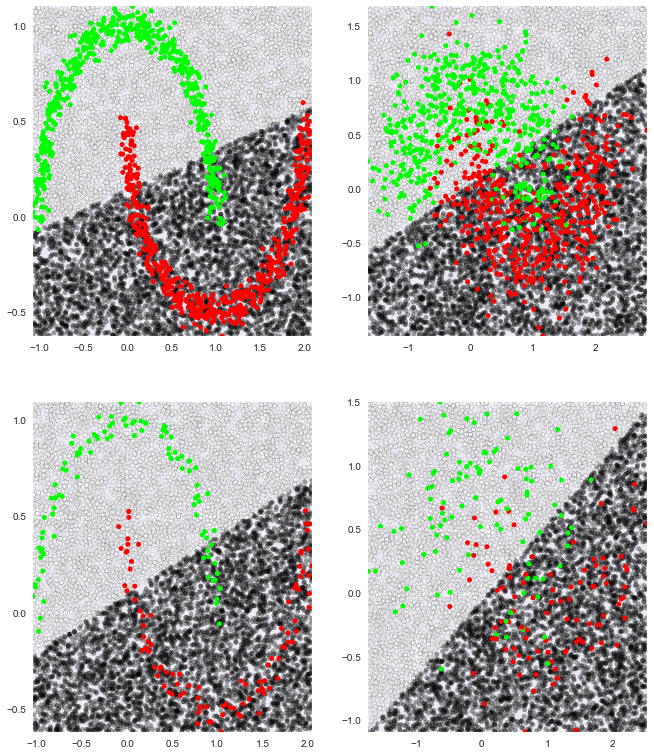

In [17]:
import sklearn.linear_model
classifier = sklearn.linear_model.LogisticRegression()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1

### Árboles de decisión

#### Características generales
* Los árboles de decisión se basan en estructuras de datos espaciales (kdtrees).
* Son el ejemplo de "low bias/high variance"
* No paramétricos
* Discriminativos

#### Pros
* Fáciles de interpretar. Pueden ser visualizados.
* Requieren poca preparación de los datos (no hace falta normalizarlos).
* Funcionan tanto con datos numéricos como con categóricos.
* Son un modelo de caja blanca, la estructura del modelo se puede expresar mediante lógica booleana. En contrasten un modelo de caja negra como las redes neuroanesl resultan más difíciles de interpretar.

#### Cons
* **Overfitting**
* ** Unstable** (high variance): pequeñas variaciones en los datos pueden tener resultados muy diferentes
* Encontrar el árbol de decisión óptimo (el más pequeño que minimiza el error) es NP-hard, por lo que hace falta usar heurísticas.
* Datos no balanceados llevan a árboles con un alto bias.